In [150]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab
from pylab import *
import matplotlib.dates as mdate
from numpy import genfromtxt
import matplotlib.patches as patches

%matplotlib inline

In [151]:
base = '04301600'
total_ingested = genfromtxt(base + '/data/cumul-ingested-count.stat', delimiter=',')
total_mem = genfromtxt(base + '/data/cumul-memory-usage.stat', delimiter=',')
cumul_backlog = genfromtxt(base + '/data/cumul-backlog.stat', delimiter=',')
cumul_throughput = genfromtxt(base + '/data/cumul-throughput.stat', delimiter=',')
sketch_count = genfromtxt(base + '/data/sketchlet-count.stat', delimiter=',')

In [152]:
scale_out = []
scale_out_t1 = []
scale_in = []
with open(base + '/data/scale-activity.stat') as f:
    for line in f:
        splits = line.split(',')
        if splits[4].rstrip() == 'scale-out':
            if (splits[1]=='lattice-49:9099' or splits[1]=='lattice-50:9099' or splits[1]=='lattice-52:9099'):
                scale_out_t1.append([float(splits[2]), float(splits[3])])
            else:
                scale_out.append([float(splits[2]), float(splits[3])])
        else:
            scale_in.append([float(splits[2]), float(splits[3])])

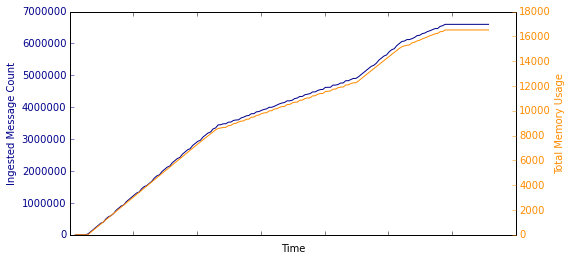

In [153]:
fig,ax2 = plt.subplots(figsize=(8,4))
leg_ing = plt.plot(total_ingested[:,0], total_ingested[:,1], color='darkblue', label='Ingested Message Count')
pylab.ylabel('Ingested Message Count', fontsize=10)
ax2.tick_params(axis='y', colors='darkblue')
ax2.yaxis.label.set_color('darkblue')
ax2.xaxis.set_major_formatter(NullFormatter())
pylab.xlabel('Time', fontsize=10)

ax = ax2.twinx()
leg_mem = plt.plot(total_mem[:,0], total_mem[:,1], color='darkorange', label='Total Memory Usage')
ax.tick_params(axis='y', colors='darkorange')
pylab.ylabel('Total Memory Usage', fontsize=10)
ax.yaxis.label.set_color('darkorange')

plt.savefig(base +'/figs/ing-and-mem-usage.pdf', dpi=300)

In [154]:
plt.close()

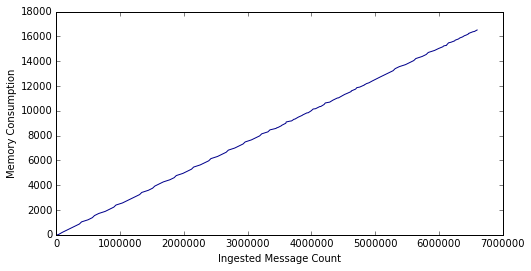

In [155]:
fig = plt.figure(figsize=(8,4))
plt.plot(total_ingested[:,1], total_mem[:,1], color='darkblue', label='Ingested Message Count')
pylab.ylabel('Memory Consumption', fontsize=10)
pylab.xlabel('Ingested Message Count', fontsize=10)

In [156]:
fig.savefig(base + '/figs/mem-usage-vs-ingested-count.pdf', dpi=300)

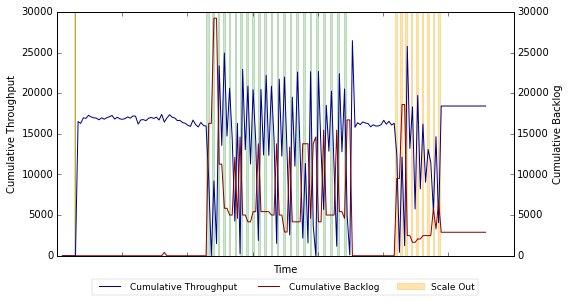

In [161]:
fig2,ax3 = plt.subplots(figsize=(8,4))
leg_throughput = plt.plot(cumul_throughput[:,0], cumul_throughput[:,1], color='darkblue', label='Cumulative Throughput')
pylab.ylabel('Cumulative Throughput', fontsize=10)
ax3.xaxis.set_major_formatter(NullFormatter())
pylab.xlabel('Time', fontsize=10)

ax4 = ax3.twinx()
leg_backlog = plt.plot(cumul_backlog[:,0], cumul_backlog[:,1], color='darkred', label='Cumulative Backlog')
pylab.ylabel('Cumulative Backlog', fontsize=10)

for entry in scale_out_t1:
    ax3.add_patch(patches.Rectangle((entry[0],0), (entry[1] - entry[0]), 30000, alpha=0.2, color='green', label='Scale Out'))

for entry in scale_out:
    leg_scale_out = ax3.add_patch(patches.Rectangle((entry[0],0), (entry[1] - entry[0]), 30000, alpha=0.3, color='orange', label='Scale Out'))

lns = leg_throughput + leg_backlog
lns = lns + [leg_scale_out]
labs = [l.get_label() for l in lns]
leg = ax3.legend(lns, labs, fontsize=9, ncol=6, bbox_to_anchor=(0.5, -0.16), loc=8, borderaxespad=0., handlelength=3)
#leg = ax3.legend(lns, labs, fontsize=9)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()
#for entry in scale_in:
#    ax3.add_patch(patches.Rectangle((entry[0],0), (entry[1] - entry[0]), 30000, alpha=0.4, color='blue', label='Scale Out'))

In [158]:
fig2.savefig(base + '/figs/cumul_throughput.pdf', dpi=300, bbox_extra_artists=(leg,), bbox_inches='tight')


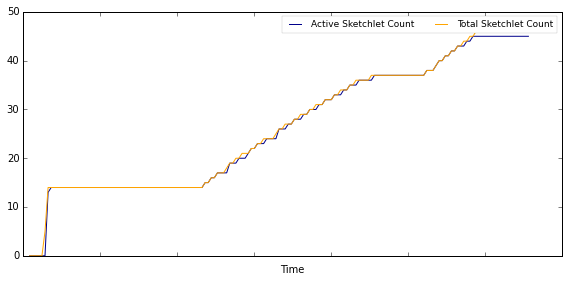

In [159]:

fig3,ax4 = plt.subplots(figsize=(8,4))
active_sketch_count = plt.plot(sketch_count[:,0], sketch_count[:,1], color='darkblue', label='Active Sketchlet Count')
total_sketch_count = plt.plot(sketch_count[:,0], sketch_count[:,2], color='orange', label='Total Sketchlet Count')
ax4.xaxis.set_major_formatter(NullFormatter())
pylab.xlabel('Time', fontsize=10)
lns = active_sketch_count + total_sketch_count
labs = [l.get_label() for l in lns]
leg = ax4.legend(lns, labs, fontsize=9, ncol=2)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()

In [160]:
fig3.savefig(base + '/figs/sketch_count.pdf', dpi=300)
plt.close()